In [ ]:

# Import required packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [ ]:
# Get train and test data into dataframes
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [ ]:
# Info
print(df_train.info())
# Describe
print(df_train.describe())
# Show first few rows
print(df_train.head())
# Show column names
print(df_train.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean 

In [ ]:
# Load datasets
aux1 = df_train.drop('label', axis=1)
train_X = df_train[aux1.columns]
train_Y = df_train[['label']]
test_X = df_test[aux1.columns]
print(train_X)
print(train_Y)
print(test_X)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

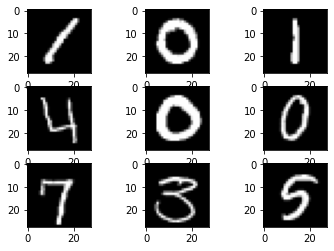

In [ ]:
# Plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(np.array(train_X.iloc[i]).reshape(28,28), cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
# Reshape images
print(train_X.shape)
train_X = np.array(train_X).reshape(42000, 28, 28)
print(train_X.shape)
test_X = np.array(test_X).reshape(28000, 28, 28)

(42000, 784)
(42000, 28, 28)


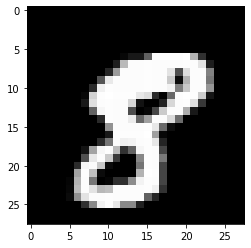

In [ ]:
plt.imshow(train_X[10], cmap=plt.get_cmap('gray'))

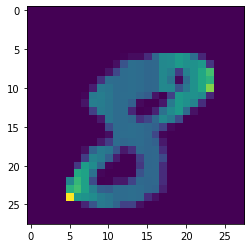

In [ ]:
# Normalize data
train_X = tf.keras.utils.normalize(train_X, axis=1)
test_X = tf.keras.utils.normalize(test_X, axis=1)
plt.imshow(train_X[10])

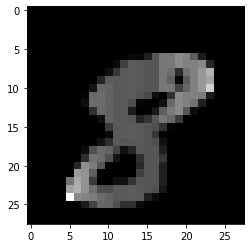

In [ ]:
plt.imshow(train_X[10], cmap=plt.get_cmap('gray'))

In [ ]:
# Resizing image for Convolution
# You always have to give a 4D array as input to the CNN.
train_X = np.array(train_X).reshape(-1, 28, 28, 1)
test_X = np.array(test_X).reshape(-1, 28, 28, 1)
print(train_X.shape)
print(test_X.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [ ]:
"""
# MODEL OPTION 1
# Creating a Deep Neural Network
# Sequential - A feedforward neural network
# Dense - A typical layer in our model
# Dropout - Is used to make the neural network more robust, by reducing overfitting
# Flatten - It is used to flatten the data for use in the dense layer
# Conv2d - We will be using a 2-Dimensional CNN
# MaxPooling2D - Pooling mainly helps in extracting sharp and smooth features. 
#   It is also done to reduce variance and computations. Max-pooling helps in extracting 
#   low-level features like edges, points, etc. While Avg-pooling goes for smooth features.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# Creating the network
model = Sequential()

### First Convolution Layer
# 64 -> number of filters, (3,3) -> size of each kernal,
# For first layer we have to mention the size of input
model.add(Conv2D(64, (3,3), input_shape = (28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

### Second Convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

### Third Convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

### Fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

### Fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

### Fully connected layer 3, output layer must be equal to number of classes
model.add(Dense(10))
model.add(Activation("softmax"))

# SHow info about the model
print(model.summary())
"""

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [ ]:
# Compile will indicate the loss function, the optimazer and the metrics
# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
# MODEL OPTION 2
# Creating a Deep Neural Network
# Sequential - A feedforward neural network
# Dense - A typical layer in our model
# Dropout - Is used to make the neural network more robust, by reducing overfitting
# Flatten - It is used to flatten the data for use in the dense layer
# Conv2d - We will be using a 2-Dimensional CNN
# MaxPooling2D - Pooling mainly helps in extracting sharp and smooth features. 
#   It is also done to reduce variance and computations. Max-pooling helps in extracting 
#   low-level features like edges, points, etc. While Avg-pooling goes for smooth features.

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# SHow info about the model
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y)

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
985/985 [==============================] - 28s 28ms/step - loss: 0.2169 - accuracy: 0.9316 - val_loss: 0.0857 - val_accuracy: 0.9728
Epoch 2/10
985/985 [==============================] - 27s 28ms/step - loss: 0.0683 - accuracy: 0.9793 - val_loss: 0.0628 - val_accuracy: 0.9803
Epoch 3/10
985/985 [==============================] - 27s 28ms/step - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.0545 - val_accuracy: 0.9830
Epoch 4/10
985/985 [==============================] - 28s 29ms/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0497 - val_accuracy: 0.9858
Epoch 5/10
985/985 [==============================] - 28s 28ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0417 - val_accuracy: 0.9889
Epoch 6/10
985/985 [==============================] - 28s 28ms/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0488 - val_accuracy: 0.9857
Epoch 7/10
985/985 [==============================] - 28s 28ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.0595 - val_accuracy:

In [ ]:
# print(train_Y)
print(y_train)

       label
0          1
1          0
2          1
3          4
4          0
...      ...
41995      0
41996      1
41997      7
41998      6
41999      9

[42000 rows x 1 columns]


In [ ]:
# Predict test data
predictions = model.predict([test_X])
print(predictions)

[[1.2682556e-11 4.0270589e-14 1.0000000e+00 ... 9.6652092e-13
  1.8019762e-12 1.0609396e-14]
 [9.9999285e-01 1.8351995e-08 1.0006780e-07 ... 3.5057548e-07
  1.1941114e-09 3.6115276e-07]
 [6.1000822e-12 4.5141858e-13 2.7449286e-11 ... 8.2767504e-10
  2.9309638e-06 9.9999690e-01]
 ...
 [3.2024708e-20 4.2620932e-15 4.1063970e-19 ... 5.5304042e-14
  3.2343103e-13 2.5235578e-13]
 [3.7678232e-11 6.4829756e-12 7.6018900e-13 ... 1.4105440e-09
  5.8601797e-11 9.9994588e-01]
 [4.7565067e-14 2.8263703e-16 1.0000000e+00 ... 3.9594542e-15
  6.0577547e-13 1.1644855e-14]]


In [ ]:
predictions_value = np.argmax(predictions, axis=1)
print(predictions_value)

[2 0 9 ... 3 9 2]


In [ ]:
# Save predictions in file
i=1
with open("predictions.csv", 'w') as f:
    f.write("ImageId,Label\n")
    for value in predictions_value:
        f.write(str(i))
        f.write(',')
        f.write(str(value))
        f.write('\n')
        i=i+1